# CNN
[Save and Load](https://www.tensorflow.org/tutorials/keras/save_and_load)

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.2


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.reshape(x_train, x_train.shape+(1,))
x_test=np.reshape(x_test, x_test.shape+(1,))
print(x_train.shape,x_train.dtype)
print(tf.math.bincount(x_train[0]))
print(tf.reduce_sum(tf.math.bincount(x_train[0])))
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28, 1) uint8
tf.Tensor(
[618   2   3   1   0   0   0   0   0   1   0   3   0   0   1   0   2   0
   5   0   0   0   0   1   1   1   1   1   0   0   1   0   0   0   0   1
   1   0   0   2   0   0   0   1   0   1   1   0   0   1   0   0   0   0
   0   1   1   0   0   0   0   0   0   0   2   0   1   0   0   0   1   0
   0   0   0   0   0   0   1   0   2   2   2   0   0   0   0   0   0   0
   1   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   1
   1   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0
   1   1   0   0   1   0   1   1   0   1   2   0   0   1   0   0   0   0
   0   0   0   0   1   0   1   0   0   0   3   0   1   0   0   0   1   0
   0   0   0   0   1   0   0   0   1   1   2   0   0   1   0   0   0   0
   0   0   2   1   0   0   1   1   0   0   2   0   0   0   0   2   0   0
   2   0   0   1   0   0   0   1   0   1   0   0   0   0   1   1   0   0
   0   0   0   2   0   1   0   0   0   2   1   0   0   1   0   0   0   0
   0   0   0   

In [5]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(input_shape= [28, 28, 1], kernel_size= 5, filters= 8, strides= 1, 
                   activation= 'relu',  kernel_initializer= 'variance_scaling'),
        tf.keras.layers.MaxPooling2D(pool_size= [2, 2], strides= [2, 2]),
        tf.keras.layers.Conv2D(kernel_size= 5, filters= 16, strides= 1, activation= 'relu', kernel_initializer= 'variance_scaling'),
        tf.keras.layers.MaxPooling2D(pool_size= [2, 2], strides= [2, 2]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units= 10, kernel_initializer= 'variance_scaling')
    ])
    model.compile(optimizer = 'adam', 
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics = ['accuracy'])
    return model

In [6]:
model = create_model()

In [7]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2155 - accuracy: 0.9369
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0717 - accuracy: 0.9779
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0534 - accuracy: 0.9840
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0375 - accuracy: 0.9885
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 9/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 10/30
1875/1875 [==============================] - 10s 5ms/step - l

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0524 - accuracy: 0.9891 - 961ms/epoch - 3ms/step


[0.05237219110131264, 0.9890999794006348]

In [9]:
model = create_model()
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 2.4360 - accuracy: 0.2247 - 1s/epoch - 3ms/step


[2.4359898567199707, 0.22470000386238098]

In [10]:
model.load_weights('./checkpoints/cnn_checkpoint')
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0531 - accuracy: 0.9899 - 873ms/epoch - 3ms/step


[0.05312630534172058, 0.9898999929428101]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
def predict(gray28s, print=False):
    p=probability_model(gray28s)
    if print:
        print(p)
    return np.argmax(p, axis=-1)

6 6


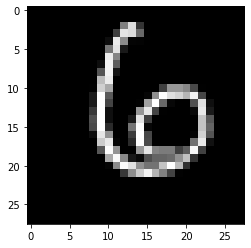

0 0


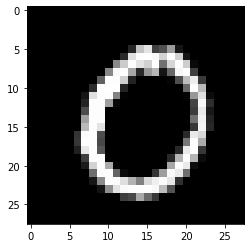

5 5


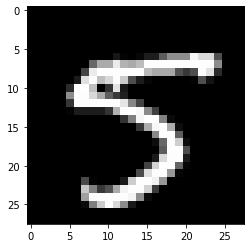

4 4


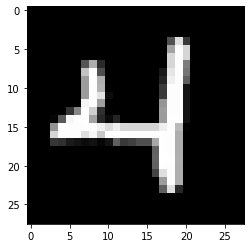

9 9


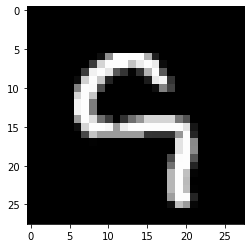

9 9


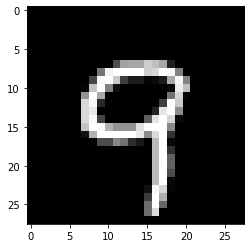

2 2


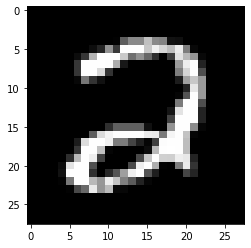

1 1


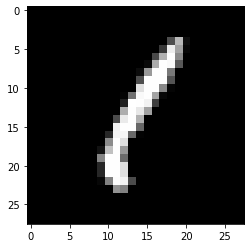

9 9


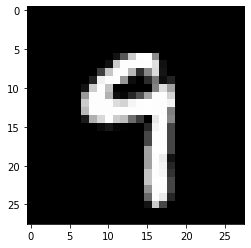

4 4


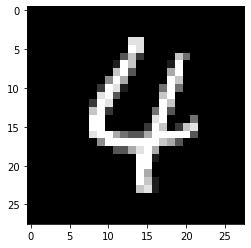

In [13]:
start = 100
v = predict(x_test[start:(start+10)])
for i in range(start,start+10):
    plt.imshow((x_test[i]*255).astype('uint8'), cmap=plt.cm.gray)
    print(y_test[i], v[i-start])
    plt.show()

In [14]:
def mypredict(imgname):
    myimg = cv2.imread(imgname, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(myimg, cv2.COLOR_BGRA2GRAY)
    gray28 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    gray28 = np.reshape(gray28, (28,28,1))
    d = predict(np.array([gray28/255.0]))[0]
    print(imgname, d)

In [15]:
mypredict("b-three-5w.jpg")

b-three-5w.jpg 3


In [16]:
for name in ["b-zero-fat.png","b-one-fat.png","b-two-fat.png","b-three-fat.png","b-four-fat.png","b-five-fat.png","b-six-fat.png","b-seven-fat.png","b-eight-fat.png","b-nine-fat.png"]:
    mypredict(name)

b-zero-fat.png 0
b-one-fat.png 1
b-two-fat.png 2
b-three-fat.png 3
b-four-fat.png 4
b-five-fat.png 5
b-six-fat.png 6
b-seven-fat.png 7
b-eight-fat.png 8
b-nine-fat.png 9


In [17]:
for name in ["four.png", "four.jpg", "seven.jpg","b-seven-fat.png","b-seven-fat-2.png","b-seven-fat-3.png","b-seven-fat-4.png","b-seven-fat-5.png"]:
    mypredict(name)

four.png 5
four.jpg 9
seven.jpg 7
b-seven-fat.png 7
b-seven-fat-2.png 7
b-seven-fat-3.png 7
b-seven-fat-4.png 7
b-seven-fat-5.png 7


In [18]:
for name in ["b-eight.png","b-five-fat.png","b-four-1.png","b-four-fat.png","b-four.png","b-nine-fat-2.png","b-nine-fat-3.png",
    "b-nine-fat-4.png","b-nine-fat-5.png","b-nine-fat.png","b-one-fat.png","b-seven-fat-2.png","b-seven-fat-3.png",
    "b-seven-fat-4.png","b-seven-fat-5.png","b-seven-fat.png","b-six-1.png","b-six-2.png","b-six-fat.png","b-six.png",
    "b-three-fat.png","b-three.png","b-two-fat.png","b-zero-fat.png"]:
    mypredict(name)


b-eight.png 8
b-five-fat.png 5
b-four-1.png 4
b-four-fat.png 4
b-four.png 4
b-nine-fat-2.png 9
b-nine-fat-3.png 9
b-nine-fat-4.png 9
b-nine-fat-5.png 9
b-nine-fat.png 9
b-one-fat.png 1
b-seven-fat-2.png 7
b-seven-fat-3.png 7
b-seven-fat-4.png 7
b-seven-fat-5.png 7
b-seven-fat.png 7
b-six-1.png 6
b-six-2.png 6
b-six-fat.png 6
b-six.png 6
b-three-fat.png 3
b-three.png 3
b-two-fat.png 2
b-zero-fat.png 0


## 參數存檔
同一個network架構下，用save_weights將參數存起來。用load_weights載入參數，可以繼續訓練或直接開始進行智慧分類。

In [ ]:
model.save_weights('./checkpoints/cnn_checkpoint')

In [ ]:
model = create_model()
model.load_weights('./checkpoints/cnn_checkpoint')

## SaveModel 格式
用 model.save將整個network的架構跟參數全部存起來。以後可以用tf.keras.models.load_model載入訓練好的newwork進行分類。

可以用與 tensorflow.js 搭配，在瀏覽器上進行分類。

In [ ]:
probability_model.save('saved_model/cnn_probability_model')

In [3]:
new_prob_model = tf.keras.models.load_model('saved_model/cnn_probability_model')


In [4]:
def modelpredict(model, gray28s, print=False):
    p=model(gray28s)
    if print:
        print(p)
    return np.argmax(p, axis=-1)

9 9


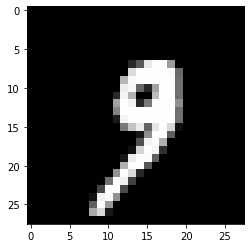

0 0


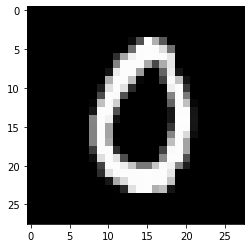

2 2


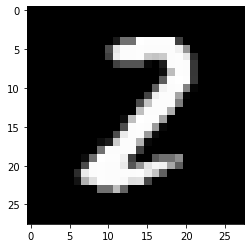

5 5


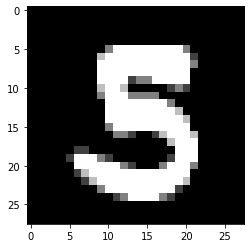

1 1


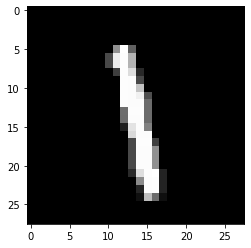

9 9


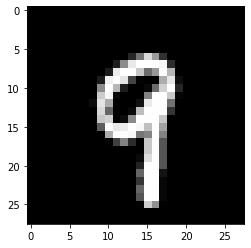

7 7


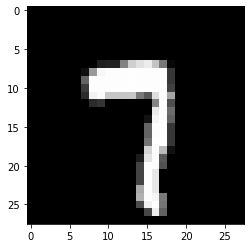

8 8


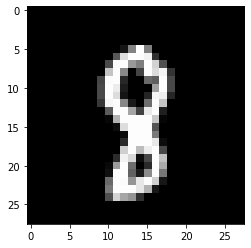

1 1


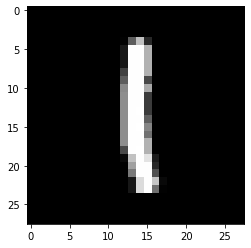

0 0


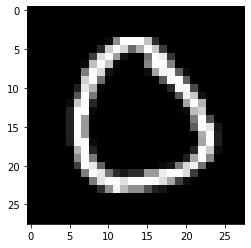

In [23]:
start = 1000
v = modelpredict(new_prob_model, x_test[start:(start+10)])
for i in range(start,start+10):
    plt.imshow((x_test[i]*255).astype('uint8'), cmap=plt.cm.gray)
    print(y_test[i], v[i-start])
    plt.show()

In [5]:
def modelpredictfile(model,imgname):
    myimg = cv2.imread(imgname, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(myimg, cv2.COLOR_BGRA2GRAY)
    gray28 = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    gray28 = np.reshape(gray28, (28,28,1))
    d = modelpredict(model, np.array([gray28/255.0]))[0]
    print(imgname, d)

In [6]:
for name in ["b-eight.png","b-five-fat.png","b-four-1.png","b-four-fat.png","b-four.png","b-nine-fat-2.png","b-nine-fat-3.png",
    "b-nine-fat-4.png","b-nine-fat-5.png","b-nine-fat.png","b-one-fat.png","b-seven-fat-2.png","b-seven-fat-3.png",
    "b-seven-fat-4.png","b-seven-fat-5.png","b-seven-fat.png","b-six-1.png","b-six-2.png","b-six-fat.png","b-six.png",
    "b-three-fat.png","b-three.png","b-two-fat.png","b-zero-fat.png"]:
    modelpredictfile(new_prob_model, name)


b-eight.png 8
b-five-fat.png 5
b-four-1.png 4
b-four-fat.png 4
b-four.png 4
b-nine-fat-2.png 9
b-nine-fat-3.png 9
b-nine-fat-4.png 9
b-nine-fat-5.png 9
b-nine-fat.png 9
b-one-fat.png 1
b-seven-fat-2.png 7
b-seven-fat-3.png 7
b-seven-fat-4.png 7
b-seven-fat-5.png 7
b-seven-fat.png 7
b-six-1.png 6
b-six-2.png 6
b-six-fat.png 6
b-six.png 6
b-three-fat.png 3
b-three.png 3
b-two-fat.png 2
b-zero-fat.png 0


In [7]:
import tensorflowjs as tfjs

In [8]:
tfjs.converters.save_keras_model(new_prob_model, "Saved_Model/converted_tfjs_model")